<div style='background-image: url("gender_crop_neu.jpg") ; padding: 5px ; background-size: cover ; border-radius: 0px ; height: 367px'>
    <div style="float: right ; margin: 90px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.7) ; width: 45% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">m/w Mitglieder Statistik</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Deutsche Geophysikalische Gesellschaft e.V.</div>
        </div>
    </div>
</div>

##### Autorinnen:
* Stefanie Donner ([@stefdonner](https://github.com/stefdonner))
* Céline Hadziioannou ([@hadzii](https://github.com/hadzii))
* Tina Martin    
* Katrin Schwalenberg
* Ana Devdaryani 
* Regina Maaß 
<br>


Und das *Komitee Chancengleichheit* der DGG.

---

# Weiblich oder männlich, das ist hier die Frage! - Wirklich?
## Geschlechtsbezogene Statistik der DGG

Dieses Notebook zeigt die Datengrundlage für den gleichnamigen Artikel in den Roten Blättern, der Mitgliederzeitschrift der [Deutschen Geophysikalischen Gesellschaft (DGG)](https://dgg-online.de).    

Entsprechend dem Zitat “You can’t manage what you don’t measure.“ wollen die Autorinnen des Artikels, den Ist-Zustand der Geschlechterverteilung unter den Mitgliedern der DGG erfassen. Das Ziel ist es, die DGG Mitglieder für dieses Thema zu sensibilisieren und hoffentlich die eine oder andere Diskussion über mögliche Ursachen der Ungleichheit anzuregen sowie Ideen und Vorschläge zu bekommen, wie die DGG die Geschlechterparität unter ihren Mitgliedern fördern kann.

Neben der Mitgliderdatenbank wurden auch Erhebungen über Beitragende auf den DGG Jahrestagungen sowie die jährliche Vergabe von DGG Preisen und Ehrungen ausgewertet.

Der Artikel steht den DGG Mitgliedern auch [online](https://dgg-online.de/mitgliederbereich/intern-rote-blaetter/) zur Verfügung.

In [1]:
# Vorbereitung: Laden von Paketen und einige grundlegende Einstellungen 
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
plt.rcParams.update(plt.rcParamsDefault)
plt.style.use('ggplot')
# Farbwahl inspiriert von https://blog.datawrapper.de/gendercolor/
Ewomen = '#008066'               # '#1E8F89'  (nicht s/w tauglich)
Emen = '#ed8e4e'                 # '#EE5A45'
#Gwomen = '#33ADBB'
#Gmen = '#FD7E23'
#Twomen = '#1FC3AA'
#Tmen = '#8624F5'

---

# DGG Mitglieder

Für die Statistik der DGG Mitglieder wurden uns freundlicherweise Auszüge aus der Mitgliederdatenbank zur Verfügung gestellt. Dies geschieht immer unter Berücksichtigung der [DSGVO](https://dsgvo-gesetz.de/). Verwendet wurden die Angaben zu Geburtsdatum, DGG Eintrittsdatum, DGG Austrittsdatum und Geschlecht. Für jedes Kalenderjahr wurde geprüft, ob die Person Mitglied war und das Alter der Person im betreffenden Jahr aus dem Geburtsdatum errechnet. Ausschließlich die Angaben Kalenderjahr, Alter und Geschlecht wurden weiter verwendet. Firmenmitglieder und solche, für die kein Geburtsdatum in der Datenbank vorhanden sind, wurden nicht berücksichtigt. 

Schlussendlich umfasst die hier gezeigte Statistik 8.809 Datenpunkte für die Jahre 2014 bis 2021. Zur detaillierteren Auswertung haben wir insgesamt drei unterschiedliche Schemata zur Altersklassifizierung verwendet: 
- Standardklassifizierung der DGG: Mitglieder jünger als 30 Jahre und älter als 65 Jahre werden als Junior- bzw. Seniormitglieder eingruppiert
- Numerische Klassifizierung: Mitglieder werden in Schritten von jeweils 5 Jahren eingruppiert
- Klassifizierung nach Karrierestatus: Master - 26 Jahre; Promotion - 31 Jahre; Etablierung/Prof. - 41 Jahre  

Für weitere Details verweisen wir auf den Artikel.


In [3]:
# Einlesen der Excell-Datei mit den Daten 
mem_std = pd.read_excel('DGG_data/DGG_statistics_standard.xlsx', header=[0], index_col=None)
display(mem_std)

,year,<30m,<30w,31-67m,31-67w,>67m,>67w
0,2014,64,51,632,150,180,1
1,2015,55,54,628,158,182,3
2,2016,51,55,635,159,184,4
3,2017,52,58,631,159,186,6
4,2018,56,60,629,171,198,6
5,2019,57,63,606,182,199,6
6,2020,59,60,592,192,201,7
7,2021,54,51,590,206,216,8


In [4]:
dat1val = mem_std.values
dat1yrs = dat1val[0:,0]
dat1Jmal = dat1val[0:,1] # Junior Mitglieder
dat1Jfem = dat1val[0:,2]
dat1Gmal = dat1val[0:,3] # allgemeine Mitglieder
dat1Gfem = dat1val[0:,4]
dat1Smal = dat1val[0:,5] # Senior Mitglieder
dat1Sfem = dat1val[0:,6]
dat1Tfem = dat1Gfem + dat1Jfem + dat1Sfem  # alle Mitglieder
dat1Tmal = dat1Gmal + dat1Jmal + dat1Smal
X = np.arange(len(dat1yrs))

In [5]:
# ein bisschen Statistik
print('Einige statistische Zahlen für die Jahre 2014 bis 2021')
print('')
print('Anzahl Frauen über die Jahre: ', dat1Tfem)
print('Anzahl Männer über die Jahre: ', dat1Tmal)
tot = dat1Tfem+dat1Tmal
print('DGG Mitglieder insgesamt: ', tot)
print('')
pf = np.around(dat1Tfem*100/tot)
pm = np.around(dat1Tmal*100/tot)
jun = np.around((dat1Jmal+dat1Jfem)*100/tot)
gen = np.around((dat1Gmal+dat1Gfem)*100/tot)
sen = np.around((dat1Smal+dat1Sfem)*100/tot)
print('Prozent Junior:innen: ',jun, np.average(jun))
print('Prozent allg. Mitglieder: ',gen, np.average(gen))
print('Prozent Senior:innen: ',sen, np.average(sen))
print('Prozent Frauen: ',pf)
print('Prozent Männer: ',pm)
print('')
into = np.around((tot[7]-tot[0])*100 / tot[0])
infe = np.around((dat1Tfem[7]-dat1Tfem[0])*100 / dat1Tfem[0])
inma = np.around((dat1Tmal[7]-dat1Tmal[0])*100 / dat1Tmal[0])
print('Anstieg über die Jahre insgesamt: ', into)
print('Anstieg über die Jahre - Frauen: ', infe)
print('Anstieg über die Jahre - Männer: ', inma)

Einige statistische Zahlen für die Jahre 2014 bis 2021

Anzahl Frauen über die Jahre:  [202 215 218 223 237 251 259 265]
Anzahl Männer über die Jahre:  [876 865 870 869 883 862 852 860]
DGG Mitglieder insgesamt:  [1078 1080 1088 1092 1120 1113 1111 1125]

Prozent Junior:innen:  [11. 10. 10. 10. 10. 11. 11.  9.] 10.25
Prozent allg. Mitglieder:  [73. 73. 73. 72. 71. 71. 71. 71.] 71.875
Prozent Senior:innen:  [17. 17. 17. 18. 18. 18. 19. 20.] 18.0
Prozent Frauen:  [19. 20. 20. 20. 21. 23. 23. 24.]
Prozent Männer:  [81. 80. 80. 80. 79. 77. 77. 76.]

Anstieg über die Jahre insgesamt:  4.0
Anstieg über die Jahre - Frauen:  31.0
Anstieg über die Jahre - Männer:  -2.0


---

### Mitgliederstatistik nach DGG Altersklassifikation

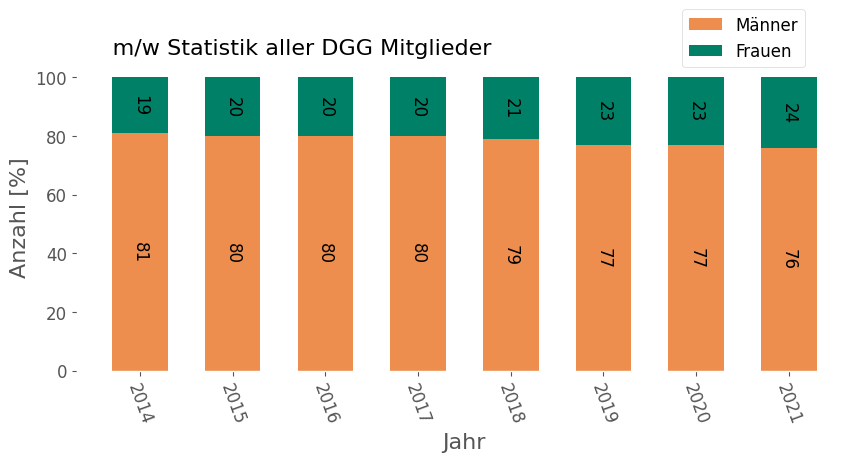

In [6]:
# Abbildung aller (allg.) Mitglieder
plt.rcParams['figure.figsize'] = 10, 4
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['lines.linewidth'] = 0.5
plt.rcParams['axes.facecolor'] = 'white' 
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 12
wd = 0.6     # Breite der Säulen in der Abbildung

plt.figure()
#Tb1 = plt.bar(X, dat1Tmal, width=wd, color=Emen, label='Männer')  # absolut
Tb1 = plt.bar(X, np.around(pm), width=wd, color=Emen, label='Männer') # Prozent
#Tb2 = plt.bar(X, dat1Tfem, width=wd, color=Ewomen, bottom=dat1Tmal, label='Frauen')  # absolut
Tb2 = plt.bar(X, np.around(pf), width=wd, color=Ewomen, bottom=np.around(pm), label='Frauen')  # Prozent
plt.bar_label(Tb1, label_type='center', rotation=-90)
plt.bar_label(Tb2, label_type='center', rotation=-90)
plt.xticks(X, dat1yrs, rotation=-70)
plt.legend(loc='upper right', bbox_to_anchor=(0.95, 1.2))
plt.title('     m/w Statistik aller DGG Mitglieder', loc='left')
plt.xlabel('Jahr')
plt.ylabel('Anzahl')  # absolut
plt.ylabel('Anzahl [%]')  # Prozent
plt.show()

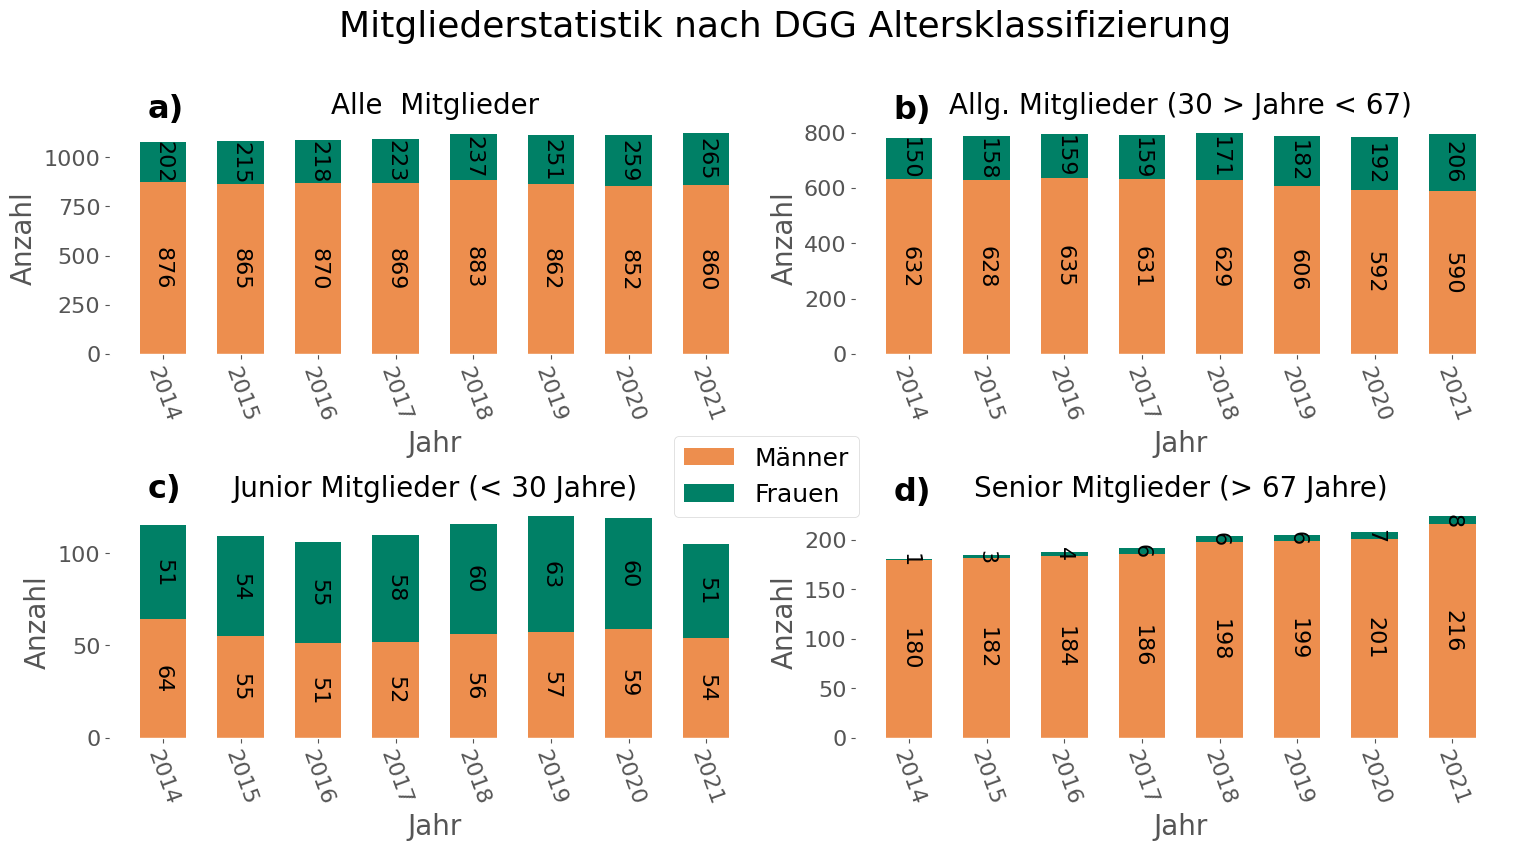

In [7]:
# 4 in 1 Darstellung der DGG Mitgliederstatistik nach DGG Altersklassifikation  
plt.rcParams['figure.figsize'] = 18, 8
plt.rcParams['figure.titlesize'] = 26
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['lines.linewidth'] = 0.5
plt.rcParams['axes.facecolor'] = 'white' 
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['legend.fontsize'] = 18
wd = 0.6     # Breite der Säulen

fig = plt.figure(constrained_layout=True)
spec = fig.add_gridspec(ncols=2, nrows=2)

# alle Mitglieder
ax0 = fig.add_subplot(spec[0, 0])
ax0.title.set_text('Alle  Mitglieder')
Tb1 = plt.bar(X, dat1Tmal, width=wd, color=Emen, label='Männer')
Tb2 = plt.bar(X, dat1Tfem, width=wd, color=Ewomen, bottom=dat1Tmal, label='Frauen')
plt.bar_label(Tb1, label_type='center', rotation=-90)
plt.bar_label(Tb2, label_type='center', rotation=-90)
plt.xticks(X, dat1yrs, rotation=-70)
plt.text(-0.2, 1200, 'a)', size='x-large', weight='bold')
plt.xlabel('Jahr')
plt.ylabel('Anzahl')

# allg. Mitglieder
ax1 = fig.add_subplot(spec[0, 1])
ax1.title.set_text('Allg. Mitglieder (30 > Jahre < 67)')
Gb1 = plt.bar(X, dat1Gmal, width=wd, color=Emen, label='Männer')
Gb2 = plt.bar(X, dat1Gfem, width=wd, color=Ewomen, bottom=dat1Gmal, label='Frauen')
plt.bar_label(Gb1, label_type='center', rotation=-90)
plt.bar_label(Gb2, label_type='center', rotation=-90)
plt.xticks(X, dat1yrs, rotation=-70)
plt.text(-0.2, 850, 'b)', size='x-large', weight='bold')
plt.xlabel('Jahr')
plt.ylabel('Anzahl')

# Junior Mitglieder 
ax2 = fig.add_subplot(spec[1, 0])
ax2.title.set_text('Junior Mitglieder (< 30 Jahre)')
Jb1 = plt.bar(X, dat1Jmal, width=wd, color=Emen, label='Männer')
Jb2 = plt.bar(X, dat1Jfem, width=wd, color=Ewomen, bottom=dat1Jmal, label='Frauen')
plt.bar_label(Jb1, label_type='center', rotation=-90)
plt.bar_label(Jb2, label_type='center', rotation=-90)
plt.xticks(X, dat1yrs, rotation=-70)
plt.text(-0.2, 130, 'c)', size='x-large', weight='bold')
plt.xlabel('Jahr')
plt.ylabel('Anzahl')

# Senior Mitglieder
ax3 = fig.add_subplot(spec[1, 1])
ax3.title.set_text('Senior Mitglieder (> 67 Jahre)')
Sb1 = plt.bar(X, dat1Smal, width=wd, color=Emen, label='Männer')
Sb2 = plt.bar(X, dat1Sfem, width=wd, color=Ewomen, bottom=dat1Smal, label='Frauen')
plt.bar_label(Sb1, label_type='center', rotation=-90)
plt.bar_label(Sb2, label_type='center', rotation=-90)
plt.xticks(X, dat1yrs, rotation=-70)
plt.legend(loc=2, bbox_to_anchor=(-0.3, 1.35))
plt.text(-0.2, 240, 'd)', size='x-large', weight='bold')
plt.xlabel('Jahr')
plt.ylabel('Anzahl')


fig.suptitle('Mitgliederstatistik nach DGG Altersklassifizierung', y=1.02)
plt.subplots_adjust(hspace=0.65, wspace=0.15)
plt.show()

---  
### Mitgliederstatistik nach numerischer Klassifikation

In [8]:
mem_num = pd.read_excel('DGG_data/DGG_statistics_5yr_steps.xlsx', header=[0], index_col=None)
mem_crs = pd.read_excel('DGG_data/DGG_statistics_career_stage.xlsx', header=[0], index_col=None)

In [9]:
#display(mem_num)
display(mem_crs)

,year,<26m,<26w,27-31m,27-31w,32-41m,32-41w,42-67m,42-67w,>67m,>67w
0,2014,16,16,63,46,146,78,471,61,180,1
1,2015,13,23,59,43,147,78,464,68,182,3
2,2016,13,13,49,49,155,77,469,75,184,4
3,2017,13,10,51,56,147,79,472,72,186,6
4,2018,15,14,53,55,142,77,475,85,198,6
5,2019,20,25,49,50,127,84,467,86,199,6
6,2020,21,27,48,47,125,92,457,86,201,7
7,2021,20,26,50,40,118,99,456,92,216,8


In [37]:
# Funktion um den obigen pandas Datenframe Zeile für Zeile zu lesen 
# dadurch bleibt das Darstellen in der nächsten Codezelle übersichtlich

def get_data_per_year(line, pframe, absolute=True):
    """ Get the data of a specific year from pandas frame. 
    
        line     : line of data frame
        absolute : switch for absolute or percent numbers
        pframe   : on which data frame to run
        
    """

    if pframe.shape[1] == 21:
        cats = ['<26','26-30','31-35','36-40','41-45','46-50','51-55','56-60','61-67','>67']
    else:
        cats = ['MSc','PhD','PostDoc','Prof *','>67']
    sc1 = len(cats)
        
    dat2val = pframe.values
    ind = dat2val[0:,0][line]  # welches Jahr?

    num_m = []     # Daten der Männer im spezifischen Jahr
    j = 1
    for i in range(int(len(dat2val[0])/2)):
        num_m.append(dat2val[line][j])      
        j += 2

    num_f = []     # Daten der Frauen im spezifischen Jahr
    j = 2
    for i in range(int(len(dat2val[0])/2)):
        num_f.append(dat2val[line][j])
        j += 2
       
    if absolute == True:       # konvertiere Absolutwerte in Prozent
        zipped = list(zip(cats, num_m, num_f))
    else:      
        maxi = np.max([num_f,num_m])
        num_f2 = np.around(num_f /maxi*100)
        num_m2 = np.around(num_m /maxi*100)
        zipped = list(zip(cats, num_m2, num_f2))
   
    pddf = pd.DataFrame(zipped, columns=['Cat', 'Male', 'Female'])   # neues Datenframe
    
    yy = range(0, len(pddf))   # y-Axe zur Darstellung
    xm = pddf['Male']          # Daten für x-Axe zur Darstellung
    xf = pddf['Female']        # Daten für x-Axe zur Darstellung
    
        
    return pddf, yy, xm, xf, ind, sc1

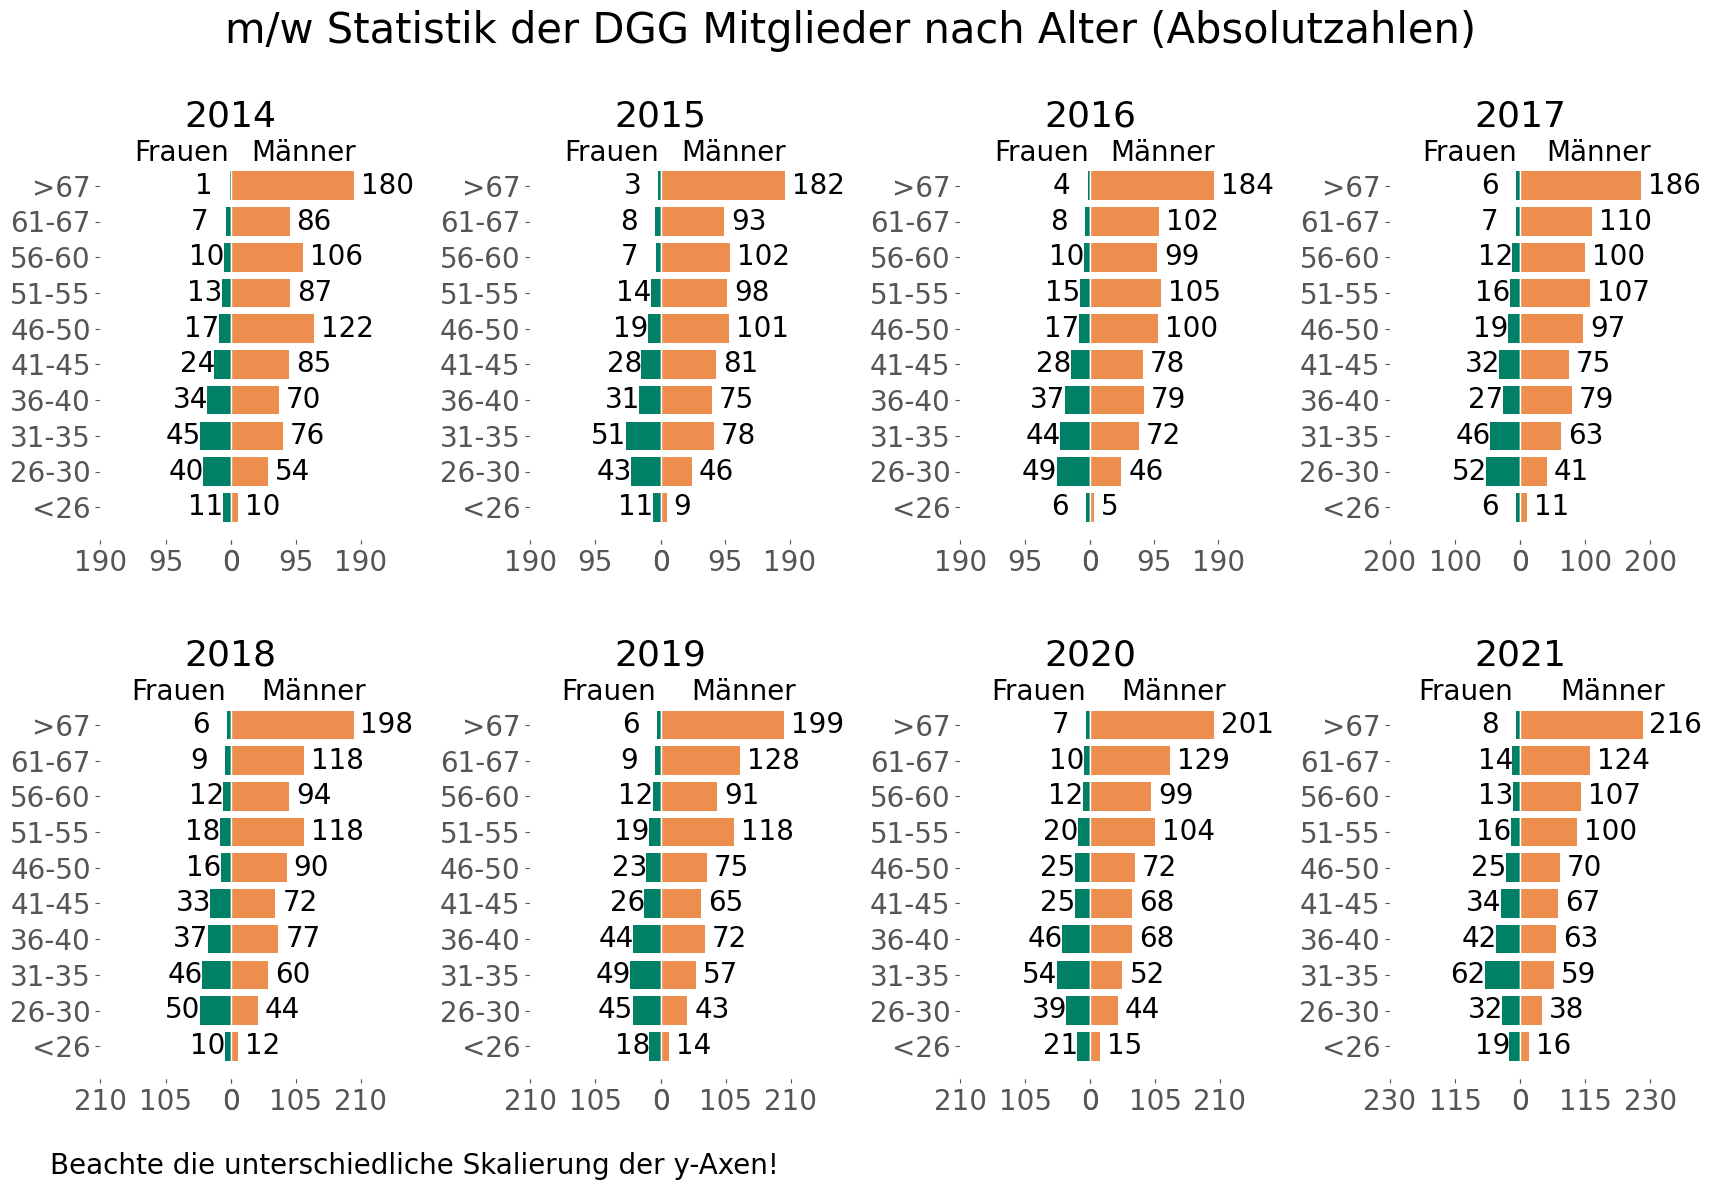

In [31]:
# Schleife über alle Zeilen (aka Jahre) im gegebenen Datenframe  
# Darstellung als Populationspyramide
# https://www.statology.org/population-pyramid-python/
# -------------------------------------------------------------------------------------
plt.rcParams['figure.figsize'] = 20, 12
plt.rcParams['figure.titlesize'] = 30
plt.rcParams['axes.facecolor'] = 'white' 
plt.rcParams['axes.titlesize'] = 26
plt.rcParams['axes.titleweight'] = 'normal'
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['font.size'] = 20

frame = mem_num    # welches pandas Datenframe incl. Beschriftung
absol = True      # Mitgliederanzahl in Absolutwerten (True) oder Prozent (False)

# Darstellung
f = plt.figure()
gs0 = gridspec.GridSpec(2, 4, figure=f, hspace=0.4, wspace=0.65)   # 4 Spalten, 2 Zeilen -> 8 Jahre

for l in range(len(frame)):
    numdf,y,x_male,x_female,yr,id1 = get_data_per_year(l, frame, absolute=absol)  # Funktion aus der Zelle oben
    hlp = np.max(numdf[['Male', 'Female']].max(axis=1))
    mx = np.round((hlp+10)/10)*10
    
    ax = f.add_subplot(gs0[l])
    ax.tick_params(left=False, labelleft=False, top=False, labeltop=False,
                   right=False, labelright=False, bottom=False, labelbottom=False)
    gssub = gs0[l].subgridspec(1, 2)
    ax.set_title(yr, y=1.05)
    ax_a = f.add_subplot(gssub[0, 0])
    ax_b = f.add_subplot(gssub[0, 1], sharey=ax_a)

    bl1 = ax_a.barh(y, x_female, align='center', color=Ewomen)
    bl2 = ax_b.barh(y, x_male, align='center', color=Emen)
    ax_a.bar_label(bl1, label_type='edge', padding=-25)
    ax_b.bar_label(bl2, label_type='edge', padding=5)
    
    ax_a.set(yticks=y, yticklabels=numdf['Cat'])
    if absol == True:
        ax_a.set(xticks=[0, mx/2, mx])
        ax_b.set(xticks=[0, mx/2, mx])
        ax_a.text(mx-50, id1-0.3, 'Frauen')
        ax_b.text(mx-160, id1-0.3, 'Männer')
        f.suptitle('m/w Statistik der DGG Mitglieder nach Alter (Absolutzahlen)', y=1.0)
    else:
        ax_a.set(xticks=[0,50,100])
        ax_b.set(xticks=[0,50,100])
        ax_a.text(80, id1-0.3, 'Frauen')
        ax_b.text(40, id1-0.3, 'Männer')
        f.suptitle('m/w Statistik der DGG Mitglieder nach Alter (Prozent)', y=1.0)
    ax_a.invert_xaxis()
    ax_b.tick_params(left=False, labelleft=False)
    f.subplots_adjust(wspace=0)

if absol == True:
    txt='Beachte die unterschiedliche Skalierung der y-Axen!'
    plt.figtext(0.1, 0.03, txt, wrap=True, horizontalalignment='left')   

plt.show()

---  
### Mitgliederstatistik nach Karrierestatus

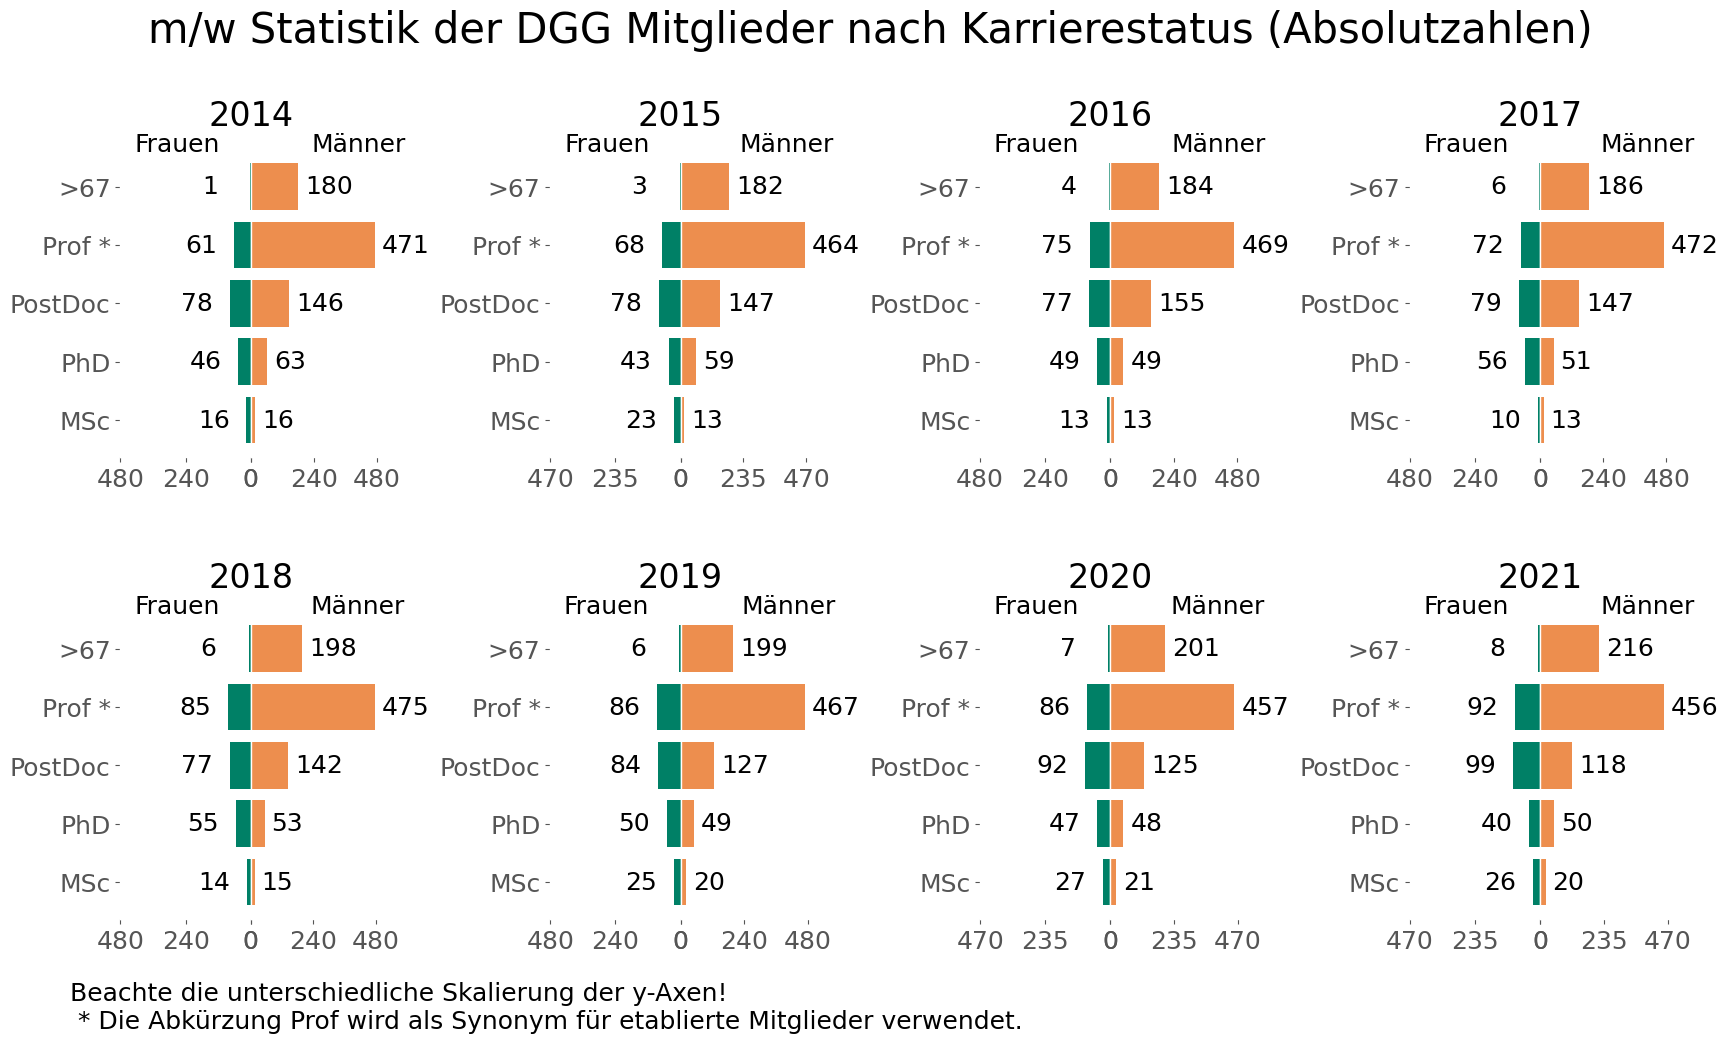

In [41]:
# loop over all lines (aka years) in given data frame  
# PLOT as population pyramid
# https://www.statology.org/population-pyramid-python/
# -------------------------------------------------------------------------------------
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['figure.titlesize'] = 30
plt.rcParams['axes.facecolor'] = 'white' 
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.titleweight'] = 'normal'
plt.rcParams['axes.labelsize'] = 26
plt.rcParams['font.size'] = 18

frame = mem_crs    # which pandas data frame and labeling for plot
absol = True      # numbers in absolute (True) or percent (False)

# PLOTTING
f = plt.figure()
gs0 = gridspec.GridSpec(2, 4, figure=f, hspace=0.5, wspace=0.65)   # 4 columns, 2 lines -> 8 years

for l in range(len(frame)):
    numdf,y,x_male,x_female,yr,id1 = get_data_per_year(l, frame, absolute=absol)  # function from cell above
    hlp = np.max(numdf[['Male', 'Female']].max(axis=1))
    mx = np.round((hlp+10)/10)*10
     
    ax = f.add_subplot(gs0[l])
    ax.tick_params(left=False, labelleft=False, top=False, labeltop=False,
                   right=False, labelright=False, bottom=False, labelbottom=False)
    gssub = gs0[l].subgridspec(1, 2)
    ax.set_title(yr, y=1.05)
    ax_a = f.add_subplot(gssub[0, 0])
    ax_a.invert_xaxis()
    ax_b = f.add_subplot(gssub[0, 1], sharey=ax_a)

    bl1 = ax_a.barh(y, x_female, align='center', color=Ewomen)
    bl2 = ax_b.barh(y, x_male, align='center', color=Emen)
    ax_a.bar_label(bl1, label_type='edge', padding=-35)
    ax_b.bar_label(bl2, label_type='edge', padding=5)

    
    ax_a.set(yticks=y, yticklabels=numdf['Cat'])
    if absol == True:
        ax_a.set(xticks=[0, mx/2, mx])
        ax_b.set(xticks=[0, mx/2, mx])
        ax_a.text(mx-50, id1-0.4, 'Frauen')
        ax_b.text(mx-250, id1-0.4, 'Männer')
        f.suptitle('m/w Statistik der DGG Mitglieder nach Karrierestatus (Absolutzahlen)', y=1.02)
    else:
        ax_a.set(xticks=[0,50,100])
        ax_b.set(xticks=[0,50,100])
        ax_a.text(70, id1-0.4, 'Frauen')
        ax_b.text(40, id1-0.4, 'Männer')
        f.suptitle('m/w Statistik der DGG Mitglieder nach Karrierestatus (Prozent)', y=1.02)
    ax_b.tick_params(left=False, labelleft=False)
    f.subplots_adjust(wspace=0)
    
if absol == True:
    txt='Beachte die unterschiedliche Skalierung der y-Axen! \n * Die Abkürzung Prof wird als Synonym für etablierte Mitglieder verwendet.'
    plt.figtext(0.1, 0.005, txt, wrap=True, horizontalalignment='left')
else:
    txt='* Die Abkürzung Prof wird als Synonym für etablierte Mitglieder verwendet.'
    plt.figtext(0.1, 0.005, txt, wrap=True, horizontalalignment='left')
    

plt.show()

---

## Statistik über Beiträge auf der Jahrestagung der DGG

Zur Erstellung der Statistik der Konferenzbeitragenden haben wir uns die Konferenzbände mit den Beitragskurzfassungen vorgenommen und die Erstautor*Innen von Vorträgen durchgezählt.

In [42]:
con1 = pd.read_excel('DGG_data/DGG_conference_contributors.xlsx', header=[1]) 
display(con1)

,Year,Female,Male
0,2017,58,155
1,2018,22,62
2,2019,67,170
3,2020,0,0
4,2021,10,20
5,2022,7,9


In [43]:
con1val = con1.values
con1yrs = con1val[0:,0]
con1fem = con1val[0:, 1]
con1mal = con1val[0:,2]
X=np.arange(len(con1yrs))

In [46]:
# ein bisschen Statistik
print('Einige statistische Zahlen')
print('')
print('Anzahl der beitragenden Frauen über die Jahre: ', con1fem)
print('Anzahl der beitragenden Männer über die Jahre: ', con1mal)
c1tot = con1fem+con1mal
print('Gesamtzahl Beitragende: ', c1tot)
print('')
c1pf = np.around(con1fem * 100 / c1tot)
print('prozentualer Anteil Frauen: ', c1pf)

Einige statistische Zahlen

Anzahl der beitragenden Frauen über die Jahre:  [58 22 67  0 10  7]
Anzahl der beitragenden Männer über die Jahre:  [155  62 170   0  20   9]
Gesamtzahl Beitragende:  [213  84 237   0  30  16]

prozentualer Anteil Frauen:  [27. 26. 28. nan 33. 44.]


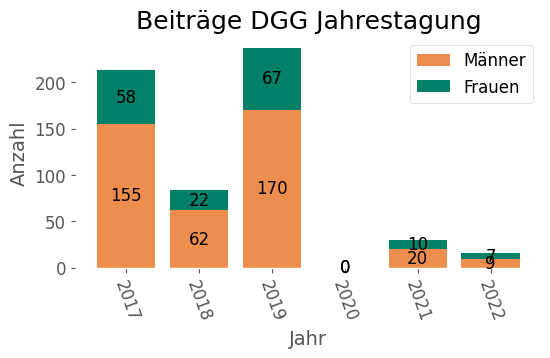

In [51]:
# Darestellung
plt.rcParams['figure.figsize'] = 6, 3
plt.rcParams['figure.titlesize'] = 6
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['lines.linewidth'] = 0.5
plt.rcParams['axes.facecolor'] = 'white' 
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 12
wd = 0.8     # Breite der Säulen

plt.figure()
Cb1 = plt.bar(X, con1mal, width=wd, color=Emen, label='Männer')
Cb2 = plt.bar(X, con1fem, width=wd, color=Ewomen, bottom=con1mal, label='Frauen')
plt.bar_label(Cb1, label_type='center', rotation=0)
plt.bar_label(Cb2, label_type='center', rotation=0)
plt.xticks(X, con1yrs, rotation=-70)
plt.legend()
plt.title('Beiträge DGG Jahrestagung')
plt.xlabel('Jahr')
plt.ylabel('Anzahl')
plt.show()

---
---

In [52]:
con2 = pd.read_excel('DGG_data/DGG_conference_plenary_speakers.xlsx', header=[1])  
display(con2)

,Year,Female,Male
0,2010,1,2
1,2011,0,6
2,2012,1,3
3,2013,1,3
4,2014,0,4
5,2015,0,4
6,2016,1,3
7,2017,1,3
8,2018,0,4
9,2019,1,3


In [53]:
con2val = con2.values
con2yrs = con2val[1:,0]
con2fem = con2val[1:, 1]
con2mal = con2val[1:,2]
X=np.arange(len(con2yrs))

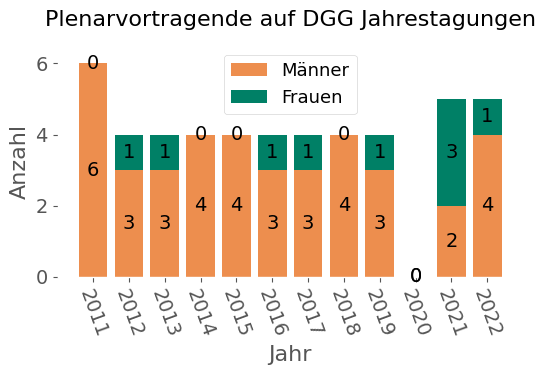

In [58]:
# Darstellung von Plenarvortragenden auf Jahrestagungen
#plt.rcParams['figure.figsize'] = 10, 4
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['lines.linewidth'] = 0.5
plt.rcParams['axes.facecolor'] = 'white' 
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['font.size'] = 14
plt.rcParams['legend.fontsize'] = 13
wd = 0.8     # width of columns in the plots

plt.figure(figsize=(6,3))
Pb1 = plt.bar(X, con2mal, width=wd, color=Emen, label='Männer')
Pb2 = plt.bar(X, con2fem, width=wd, color=Ewomen, bottom=con2mal, label='Frauen')
plt.bar_label(Pb1, label_type='center', rotation=0)
plt.bar_label(Pb2, label_type='center', rotation=0)
plt.ylim(0,6.5)
plt.xticks(X, con2yrs, rotation=-70)
plt.legend()
plt.title('Plenarvortragende auf DGG Jahrestagungen', y=1.05)
plt.xlabel('Jahr')
plt.ylabel('Anzahl')
plt.show()

---

# m/w Statistik über Empfänger*Innen von Preise und Ehrungen der DGG

Die Zahlen für diese Statistik wurde freundlicherweise vom [*DGG Komitee Ehrungen*](https://dgg-online.de/ehrungen-und-preise/) zur Verfügung gestellt. Die letzte Spalte in der unten gezeigten Tabelle gibt an, welche Preise die weiblichen Geehrten in dem jeweiligen Jahr erhalten haben.

In [59]:
awd = pd.read_excel('DGG_data/DGG_awards-honours.xlsx', header=[1])  
display(awd)

,Year,Female,Male,A+H female
0,2000,0,1,NaN
1,2001,0,2,NaN
2,2002,0,3,NaN
3,2003,0,4,NaN
4,2004,0,2,NaN
5,2005,0,4,NaN
6,2006,1,2,Zoeppritz
7,2007,0,5,NaN
8,2008,0,1,NaN
9,2009,0,3,NaN


In [60]:
awdval = awd.values
awdyrs = awdval[0:,0]
awdfem = awdval[0:, 1]
awdmal = awdval[0:,2]
X=np.arange(len(awdyrs))

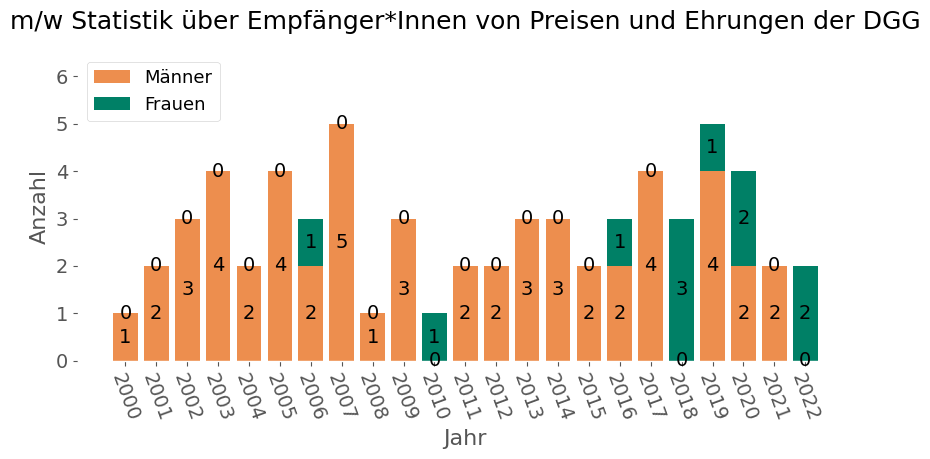

In [63]:
# plot awards and honours recipients
#plt.rcParams['figure.figsize'] = 13, 6
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['lines.linewidth'] = 0.5
plt.rcParams['axes.facecolor'] = 'white' 
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['font.size'] = 14
plt.rcParams['legend.fontsize'] = 13
wd = 0.8     # width of columns in the plots

plt.figure(figsize=(10,4))
Pb1 = plt.bar(X, awdmal, width=wd, color=Emen, label='Männer')
Pb2 = plt.bar(X, awdfem, width=wd, color=Ewomen, bottom=awdmal, label='Frauen')
plt.bar_label(Pb1, label_type='center', rotation=0)
plt.bar_label(Pb2, label_type='center', rotation=0)
plt.ylim(0,6.5)
plt.xticks(X, awdyrs, rotation=-70)
plt.legend(loc=2)
plt.title('m/w Statistik über Empfänger*Innen von Preisen und Ehrungen der DGG', y=1.05)
plt.xlabel('Jahr')
plt.ylabel('Anzahl')
plt.show()

## Acknowledgement

Wir danken Kerstin Biegemann ([Witago](http://witago.com/index.htm)), Kasper Fischer und Alexander Rudloff für die Bereitstellung der notwendigen Mitgliederdaten. Außerdem danken wir Andreas Steinberg für die manchmal notwendige technische Hilfe bei diesem Notebook.    
